# Football xG Modelling 

In [46]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Datasets

In [47]:
df= pd.read_csv('xg_model.csv')
df.shape #Contains 24 features and 1 target variable which is if it is a goal

(8118, 25)

In [48]:
df.head()

,x,y,is_goal,period,Assisted,Zone,IndividualPlay,RegularPlay,LeftFoot,RightFoot,...,Volley,FastBreak,ThrowinSetPiece,Penalty,OneOnOne,KeyPass,DirectFreekick,OwnGoal,OtherBodyPart,DirectCorner
0,80.8,51.6,False,SecondHalf,True,Center,True,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79.3,24.2,False,SecondHalf,True,Center,True,True,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,80.0,59.5,False,SecondHalf,True,Center,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,89.8,55.6,False,SecondHalf,True,Center,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,84.9,56.2,False,SecondHalf,True,Center,NaN,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df['OwnGoal'].value_counts() # 0 is no goal, 1 is goal

OwnGoal
True    27
Name: count, dtype: int64

In [50]:
df[df['OwnGoal'] == 1].shape # 0.5% of the data is a goal, so this is a very imbalanced dataset

(27, 25)

In [51]:
df=df.drop(df[df['OwnGoal'] == 1].index) # Drop the rows with a goal


In [52]:
df.shape

(8091, 25)

In [53]:
df.drop('OwnGoal', axis=1, inplace=True) # Drop own goal column

In [54]:
print(df.isna().sum()) # Check for missing values

x                     0
y                     0
is_goal               0
period                0
Assisted           2053
Zone                  0
IndividualPlay     5289
RegularPlay        2714
LeftFoot           5307
RightFoot          4106
FromCorner         6903
FirstTouch         4166
Head               6793
BigChance          6484
SetPiece           7704
Volley             7281
FastBreak          7476
ThrowinSetPiece    7904
Penalty            7985
OneOnOne           7890
KeyPass            8033
DirectFreekick     7860
OtherBodyPart      8067
DirectCorner       8089
dtype: int64


In [55]:
df.fillna(0, inplace=True) # Fill missing values with 0

In [56]:
df.head()

,x,y,is_goal,period,Assisted,Zone,IndividualPlay,RegularPlay,LeftFoot,RightFoot,...,SetPiece,Volley,FastBreak,ThrowinSetPiece,Penalty,OneOnOne,KeyPass,DirectFreekick,OtherBodyPart,DirectCorner
0,80.8,51.6,False,SecondHalf,True,Center,True,True,True,0,...,0,0,0,0,0,0,0,0,0,0
1,79.3,24.2,False,SecondHalf,True,Center,True,True,0,True,...,0,0,0,0,0,0,0,0,0,0
2,80.0,59.5,False,SecondHalf,True,Center,0,0,0,True,...,0,0,0,0,0,0,0,0,0,0
3,89.8,55.6,False,SecondHalf,True,Center,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,84.9,56.2,False,SecondHalf,True,Center,0,True,True,0,...,0,0,0,0,0,0,0,0,0,0


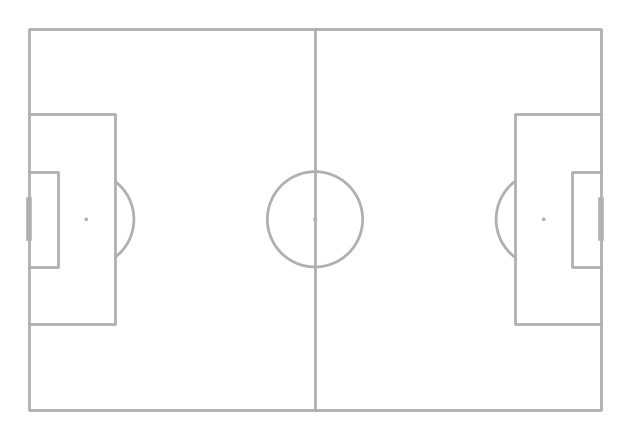

In [57]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch
pitch = Pitch()
fig, ax = pitch.draw()
plt.show()



<Axes: xlabel='x', ylabel='y'>

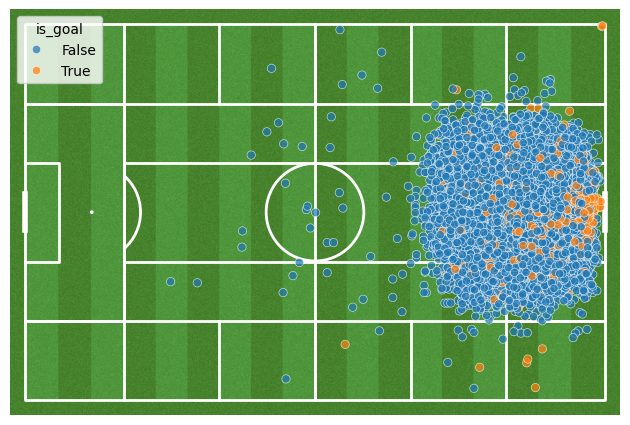

In [58]:
pitch = Pitch(pitch_type='opta', pitch_color='grass', line_color='white',
              stripe_color='#c2d59d', stripe=True, positional=True, positional_color='white')

fig, ax = pitch.draw()

# Scatter plot
sns.scatterplot(x='x', y='y', data=df, hue='is_goal', alpha=0.7, ax=ax)

In [59]:
df.dtypes

x                  float64
y                  float64
is_goal               bool
period              object
Assisted            object
Zone                object
IndividualPlay      object
RegularPlay         object
LeftFoot            object
RightFoot           object
FromCorner          object
FirstTouch          object
Head                object
BigChance           object
SetPiece            object
Volley              object
FastBreak           object
ThrowinSetPiece     object
Penalty             object
OneOnOne            object
KeyPass             object
DirectFreekick      object
OtherBodyPart       object
DirectCorner        object
dtype: object

In [60]:
df = df.astype({
    'x': float,
    'y': float,
    'is_goal': bool,
    'period': str,
    'Assisted': bool,
    'Zone': str,
    'IndividualPlay':bool,
    'RegularPlay':bool,
    'LeftFoot':bool,
    'RightFoot':bool,
    'FromCorner':bool,
    'FirstTouch':bool, 
    'Head':bool,
    'BigChance': bool,
    'SetPiece': bool,
    'Volley': bool,
    'FastBreak':bool,
    'ThrowinSetPiece':bool,
    'Penalty':bool, 
    'OneOnOne':bool,
    'KeyPass': bool,
    'OtherBodyPart': bool
})

In [61]:
df.head()

,x,y,is_goal,period,Assisted,Zone,IndividualPlay,RegularPlay,LeftFoot,RightFoot,...,SetPiece,Volley,FastBreak,ThrowinSetPiece,Penalty,OneOnOne,KeyPass,DirectFreekick,OtherBodyPart,DirectCorner
0,80.8,51.6,False,SecondHalf,True,Center,True,True,True,False,...,False,False,False,False,False,False,False,0,False,0
1,79.3,24.2,False,SecondHalf,True,Center,True,True,False,True,...,False,False,False,False,False,False,False,0,False,0
2,80.0,59.5,False,SecondHalf,True,Center,False,False,False,True,...,False,False,False,False,False,False,False,0,False,0
3,89.8,55.6,False,SecondHalf,True,Center,False,False,False,False,...,False,False,False,False,False,False,False,0,False,0
4,84.9,56.2,False,SecondHalf,True,Center,False,True,True,False,...,False,False,False,False,False,False,False,0,False,0


In [72]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [73]:
label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])


In [74]:
X= df.drop(['is_goal'], axis=1)
y= df['is_goal']
X.shape, y.shape

((8091, 23), (8091,))

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
df.columns

Index(['x', 'y', 'is_goal', 'period', 'Assisted', 'Zone', 'IndividualPlay',
       'RegularPlay', 'LeftFoot', 'RightFoot', 'FromCorner', 'FirstTouch',
       'Head', 'BigChance', 'SetPiece', 'Volley', 'FastBreak',
       'ThrowinSetPiece', 'Penalty', 'OneOnOne', 'KeyPass', 'DirectFreekick',
       'OtherBodyPart', 'DirectCorner'],
      dtype='object')

In [77]:
df.head()

,x,y,is_goal,period,Assisted,Zone,IndividualPlay,RegularPlay,LeftFoot,RightFoot,...,SetPiece,Volley,FastBreak,ThrowinSetPiece,Penalty,OneOnOne,KeyPass,DirectFreekick,OtherBodyPart,DirectCorner
0,80.8,51.6,False,1,True,1,True,True,True,False,...,False,False,False,False,False,False,False,0,False,0
1,79.3,24.2,False,1,True,1,True,True,False,True,...,False,False,False,False,False,False,False,0,False,0
2,80.0,59.5,False,1,True,1,False,False,False,True,...,False,False,False,False,False,False,False,0,False,0
3,89.8,55.6,False,1,True,1,False,False,False,False,...,False,False,False,False,False,False,False,0,False,0
4,84.9,56.2,False,1,True,1,False,True,True,False,...,False,False,False,False,False,False,False,0,False,0


In [78]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier()
}

In [79]:
model_results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred))
    print("-" * 50)

Training Logistic Regression...
Logistic Regression Accuracy: 0.8938
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

       False       0.89      1.00      0.94      1435
        True       0.88      0.08      0.14       184

    accuracy                           0.89      1619
   macro avg       0.88      0.54      0.54      1619
weighted avg       0.89      0.89      0.85      1619

--------------------------------------------------
Training Decision Tree...
Decision Tree Accuracy: 0.8283
Classification Report for Decision Tree:
               precision    recall  f1-score   support

       False       0.91      0.89      0.90      1435
        True       0.28      0.32      0.30       184

    accuracy                           0.83      1619
   macro avg       0.59      0.61      0.60      1619
weighted avg       0.84      0.83      0.83      1619

--------------------------------------------------
Training Random Forest...
Ra

C:\Users\akash\AppData\Local\Temp\ipykernel_50336\2274396591.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_results.keys()), y=list(model_results.values()), palette='viridis')


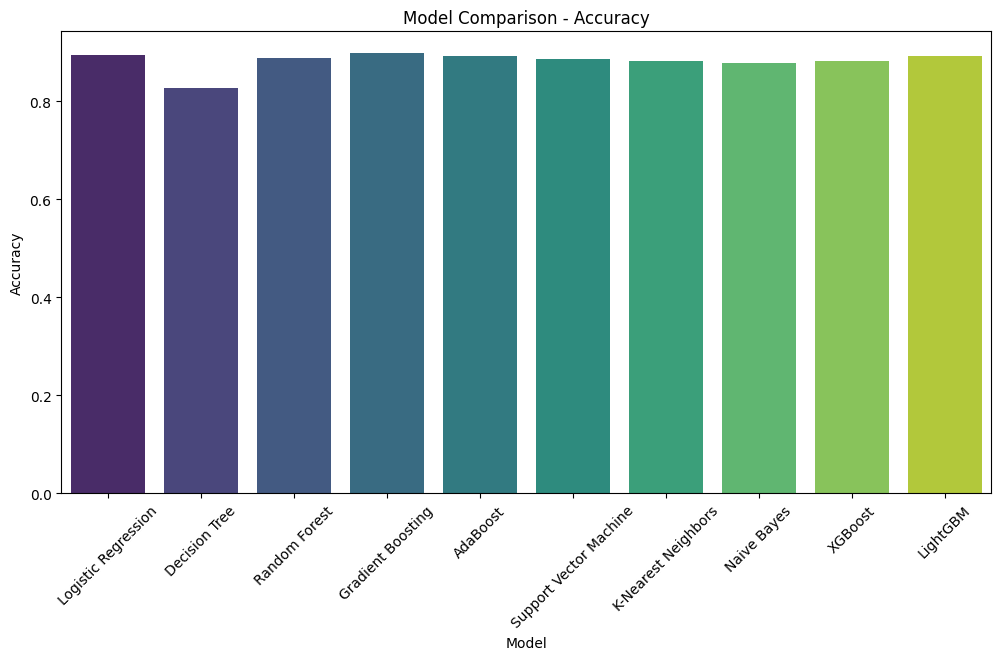

In [80]:
plt.figure(figsize=(12, 6))
sns.barplot(x=list(model_results.keys()), y=list(model_results.values()), palette='viridis')
plt.title("Model Comparison - Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

Logistic Regression CV Accuracy: 0.8856
Decision Tree CV Accuracy: 0.8333
Random Forest CV Accuracy: 0.8805
Gradient Boosting CV Accuracy: 0.8907
AdaBoost CV Accuracy: 0.8860
Support Vector Machine CV Accuracy: 0.8771
K-Nearest Neighbors CV Accuracy: 0.8844
Naive Bayes CV Accuracy: 0.8182
XGBoost CV Accuracy: 0.8828
[LightGBM] [Info] Number of positive: 795, number of negative: 5677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000773 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 541
[LightGBM] [Info] Number of data points in the train set: 6472, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.122837 -> initscore=-1.965836
[LightGBM] [Info] Start training from score -1.965836
[LightGBM] [Info] Number of positive: 796, number of negative: 5677
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000819 seconds.
You can set `force_ro

C:\Users\akash\AppData\Local\Temp\ipykernel_50336\115738341.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(cv_results.keys()), y=list(cv_results.values()), palette='coolwarm')


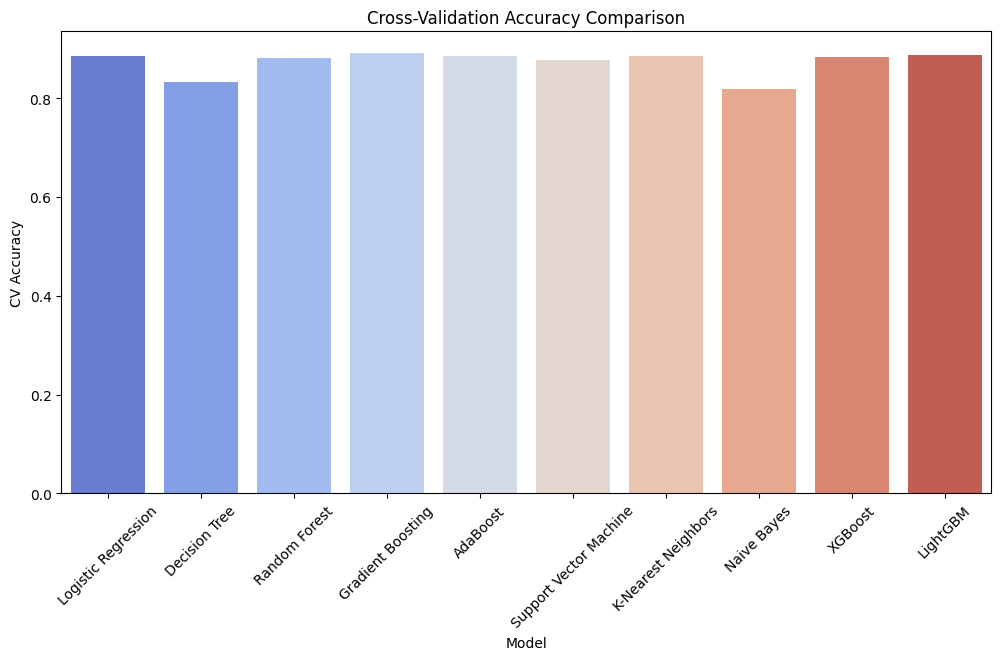

In [81]:
cv_results = {}

for name, model in models.items():
    cv_score = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
    cv_results[name] = cv_score
    print(f"{name} CV Accuracy: {cv_score:.4f}")

plt.figure(figsize=(12, 6))
sns.barplot(x=list(cv_results.keys()), y=list(cv_results.values()), palette='coolwarm')
plt.title("Cross-Validation Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("CV Accuracy")
plt.xticks(rotation=45)
plt.show()

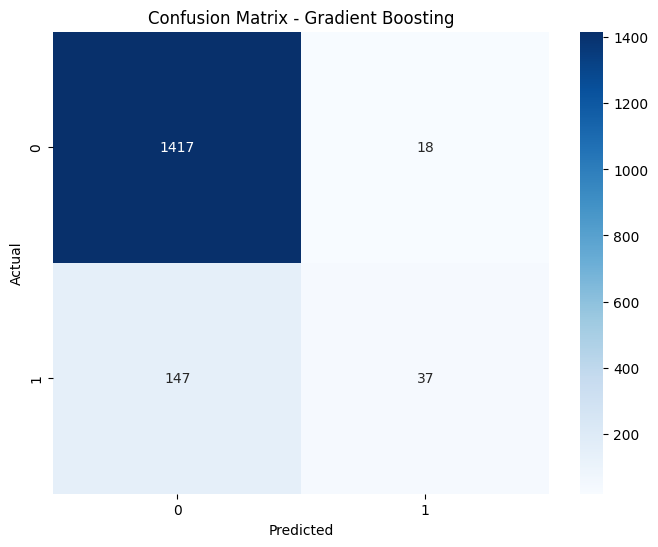

In [82]:
best_model_name = max(model_results, key=model_results.get)
best_model = models[best_model_name]

y_pred_best = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [84]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 20, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.5]
}

grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 100}
Best Accuracy: 0.8909152429090605


In [85]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [86]:
y_pred_proba[0:10]

array([0.10636468, 0.82566651, 0.02183636, 0.03013644, 0.05535592,
       0.00688808, 0.00319979, 0.01134983, 0.02350931, 0.01306743])